In [ ]:
!pip install torch torchvision matplotlib pillow numpy opencv-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 114.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 87.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 48.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 25.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

Enter '1' to process an image or '2' to process a video: 1
Upload an image file...


Saving test.jpg to test (3).jpg
Processed image saved at output_image.jpg


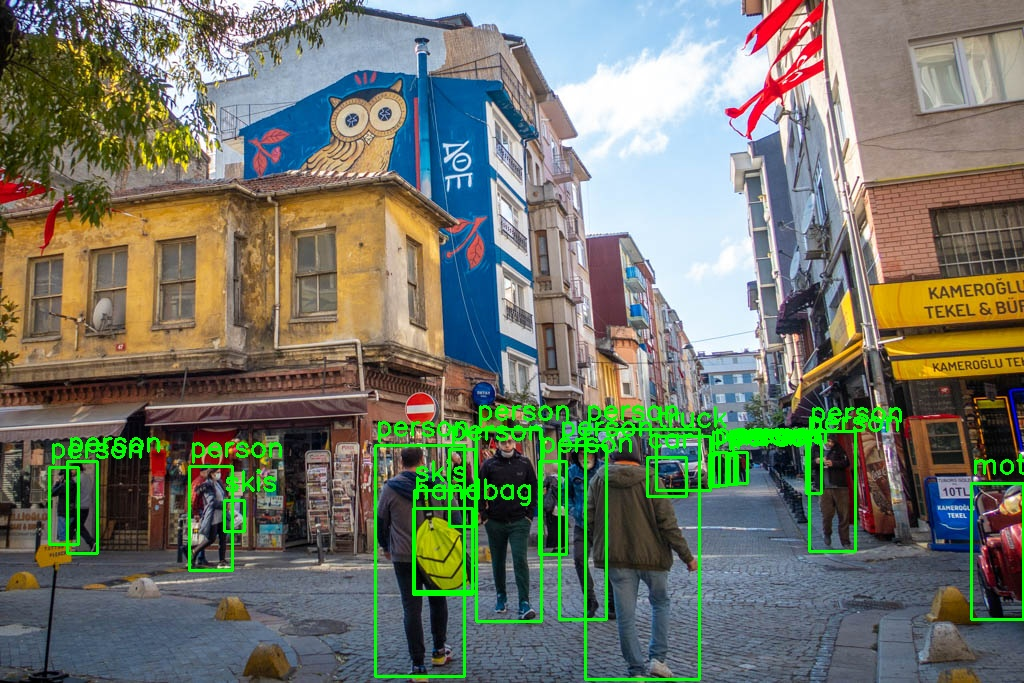

In [14]:
# Object Detection on Images and Videos using Faster R-CNN with File Upload in Google Colab

# Import necessary libraries
import torch
import torchvision
import cv2
import numpy as np
from google.colab import files  # For file uploads in Colab

# Step 1: Load the pre-trained Faster R-CNN model
def load_model():
    # Load a pre-trained Faster R-CNN model trained on COCO dataset
    model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
    model.eval()  # Set the model to evaluation mode
    return model

# Step 2: Perform object detection on a single frame or image
def detect_objects(frame, model):
    # Convert the frame to a tensor
    frame_tensor = torchvision.transforms.functional.to_tensor(frame)

    # Perform inference
    with torch.no_grad():
        predictions = model([frame_tensor])

    # Extract predictions
    pred_classes = []
    pred_boxes = []
    pred_scores = []

    # Ensure predictions exist and are valid
    if 'labels' in predictions[0] and 'boxes' in predictions[0] and 'scores' in predictions[0]:
        for i, label in enumerate(predictions[0]['labels'].cpu().numpy()):
            # Check if the label is within the valid range
            if 0 <= label < len(COCO_INSTANCE_CATEGORY_NAMES):
                pred_classes.append(COCO_INSTANCE_CATEGORY_NAMES[label])
                pred_boxes.append([(predictions[0]['boxes'][i][0].item(), predictions[0]['boxes'][i][1].item()),
                                   (predictions[0]['boxes'][i][2].item(), predictions[0]['boxes'][i][3].item())])
                pred_scores.append(predictions[0]['scores'][i].item())
            else:
                print(f"Warning: Invalid class label {label} detected. Skipping...")

    # Filter predictions with a confidence threshold
    confidence_threshold = 0.5
    filtered_boxes = []
    filtered_labels = []
    for box, label, score in zip(pred_boxes, pred_classes, pred_scores):
        if score > confidence_threshold:
            filtered_boxes.append(box)
            filtered_labels.append(label)

    return filtered_boxes, filtered_labels

# Step 3: Define COCO class labels
COCO_INSTANCE_CATEGORY_NAMES = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign',
    'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
    'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag',
    'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite',
    'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
    'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana',
    'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
    'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'dining table',
    'toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
    'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock',
    'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]

# Step 4: Process a single image
def process_image(image_path, model):
    # Load the image
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error: Unable to load image at {image_path}")
        return

    # Perform object detection
    boxes, labels = detect_objects(image, model)

    # Draw bounding boxes and labels on the image
    for box, label in zip(boxes, labels):
        start_point, end_point = box
        image = cv2.rectangle(image, (int(start_point[0]), int(start_point[1])),
                              (int(end_point[0]), int(end_point[1])), (0, 255, 0), 2)
        image = cv2.putText(image, label, (int(start_point[0]), int(start_point[1]) - 10),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

    # Save or display the processed image
    output_path = "output_image.jpg"
    cv2.imwrite(output_path, image)
    print(f"Processed image saved at {output_path}")

    # Display the image in Colab
    from IPython.display import Image, display
    display(Image(output_path))

# Step 5: Process a video
def process_video(video_path, model):
    # Open the video file
    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        print(f"Error: Unable to open video at {video_path}")
        return

    # Get video properties
    frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = cap.get(cv2.CAP_PROP_FPS)

    # Define the codec and create a VideoWriter object to save the output
    output_path = "output_video.mp4"
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(output_path, fourcc, fps, (frame_width, frame_height))

    while True:
        ret, frame = cap.read()
        if not ret:
            break

        # Perform object detection
        boxes, labels = detect_objects(frame, model)

        # Draw bounding boxes and labels on the frame
        for box, label in zip(boxes, labels):
            start_point, end_point = box
            frame = cv2.rectangle(frame, (int(start_point[0]), int(start_point[1])),
                                  (int(end_point[0]), int(end_point[1])), (0, 255, 0), 2)
            frame = cv2.putText(frame, label, (int(start_point[0]), int(start_point[1]) - 10),
                                cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

        # Write the frame into the output file
        out.write(frame)

    # Release resources
    cap.release()
    out.release()
    print(f"Processed video saved at {output_path}")

# Step 6: Main function with file upload in Colab
def main():
    # Load the model
    model = load_model()

    # Choose between processing an image or a video
    choice = input("Enter '1' to process an image or '2' to process a video: ")

    if choice == '1':
        print("Upload an image file...")
        uploaded = files.upload()  # Upload file in Colab
        if not uploaded:
            print("No image file uploaded. Exiting...")
            return

        # Get the uploaded file path
        image_path = list(uploaded.keys())[0]
        process_image(image_path, model)
    elif choice == '2':
        print("Upload a video file...")
        uploaded = files.upload()  # Upload file in Colab
        if not uploaded:
            print("No video file uploaded. Exiting...")
            return

        # Get the uploaded file path
        video_path = list(uploaded.keys())[0]
        process_video(video_path, model)
    else:
        print("Invalid choice. Please enter '1' for image or '2' for video.")

if __name__ == "__main__":
    main()